In [33]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
import cartopy.crs as ccrs
import cartopy
from scipy.stats import linregress
import pandas as pd

In [34]:
files=sorted(glob.glob('/home/z5241410/Desktop/UNSW/Calipso_data/full_data/Map_OPAQ330m*.nc'))
ds=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [35]:
clt_opz=ds['cltcalipso_opaque_z']
opz=ds['zopaque']
diff=(clt_opz)-opz
cloudtop=(clt_opz)+diff

In [36]:
climatology=cloudtop.groupby('time.month').mean('time')
anomalies=cloudtop.groupby('time.month')-climatology

In [37]:
nino=np.array([24.86, 25.08,26.07, 26.83 ,27.09 ,27.04 ,26.99, 26.72 ,26.47 ,26.37 ,26.25, 25.74, 25.66 ,25.96 ,26.59 ,27.47 ,27.99 ,28.04 ,27.78 ,27.42 ,27.40 ,27.60 ,28.16, 28.34, 28.07 ,28.01 ,28.18 ,28.20 ,27.71 ,27.04 ,26.22 ,25.47 ,25.12 ,25.03 ,25.06, 25.00, 25.00 ,25.64 ,26.36 ,27.05 ,27.41 ,27.35 ,26.87 ,26.21 ,25.92 ,25.67 ,25.52, 25.54, 25.67 ,26.08 ,26.67 ,27.32 ,27.61 ,27.75 ,27.54 ,27.32 ,27.10 ,26.98 ,26.86, 26.34, 26.01 ,26.24 ,27.03 ,27.57 ,27.53 ,27.30 ,26.91 ,26.47 ,26.54 ,26.52 ,26.56, 26.43, 26.05 ,26.14 ,27.00 ,27.90 ,28.25 ,27.96 ,27.23 ,26.82 ,27.01 ,27.16 ,27.46 ,27.31, 27.05 ,27.17 ,27.75 ,28.52 ,28.85 ,28.90 ,28.75 ,28.79 ,28.93 ,29.08 ,29.42, 29.26, 29.11 ,28.90 ,28.72 ,28.23 ,27.69 ,26.82 ,26.28 ,26.14 ,25.98 ,25.94, 26.10, 26.12 ,26.67 ,27.32 ,28.03 ,28.30 ,28.06 ,27.54 ,26.70 ,26.29 ,26.15 ,25.74])

In [38]:
def point_regression(x):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,nino)
    return [slope, intercept, rvalue]


In [39]:
anomalies.isel(latitude=15, longitude=150).shape

(118,)

In [40]:
nino.shape

(118,)

In [41]:
point_regression(anomalies.isel(latitude=15, longitude=150))

/home/z5241410/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[0.0532856150343695, 27.01279660844687, 0.07280213535505319]

In [42]:
time_axis = 0
r = np.apply_along_axis(point_regression, time_axis, anomalies)
r

/home/z5241410/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [26]:
anomalies.isel(latitude=15, longitude=150).values

/home/z5241410/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([-3.6187911e-01, -2.0340061e-01, -7.6008201e-01, -2.5233674e-01,
       -1.2390585e+00, -3.2848244e+00,  5.6193137e-01,  1.9315844e+00,
        2.5019264e-01,  1.5454767e+00,  2.9248464e+00,  6.5932536e-01,
        1.3790321e-01, -4.3188739e-01, -5.5761337e-02,  1.5787792e+00,
        2.0958610e+00, -1.5206652e+00,  1.6964514e+00, -2.5598722e+00,
        4.0052795e-01,  2.0385153e+00,  1.6647322e+00,  9.5089364e-01,
       -1.0614061e-01,  1.4255524e-01,  1.4581585e-01,  7.0587254e-01,
        8.9081097e-01,  2.7321515e+00,  2.1289179e+00, -3.9280558e-01,
       -8.5813808e-01,  1.0134199e+00, -9.5076013e-01, -1.3993653e+00,
       -1.2937272e+00, -1.2468715e+00, -5.1377845e-01, -1.8408318e+00,
       -2.0551257e+00, -1.7943988e+00,  2.1291900e-01, -1.0859544e+00,
        2.0215859e+00,  2.0459795e-01, -1.2314188e+00, -4.0730405e-01,
        3.7737842e+00,  2.1817579e+00, -1.6059259e+00, -1.2769735e+00,
        2.4798331e+00,  1.4396949e+00, -8.4332204e-01,  9.5499039e-01,
      

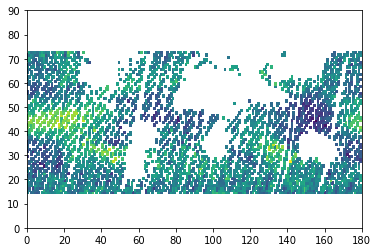

In [45]:
plt.pcolormesh(r[0,:,:])